<a href="https://colab.research.google.com/github/CVH4OYC/ML_lab/blob/main/%D0%A4%D0%9C%D0%98_Disbalanced_dataset_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> ФМИ. Disbalanced dataset.  Part 2 </h1>
<h1 align="center"> Credit card Fraud Detector </h1>


<h2> Введение </h2>

На данном семинаре мы будем реализовывать различные прогностические модели, чтобы проверить, насколько точно они определяют, является ли транзакция обычным платежом (non Fraud) или мошенничеством (Fraud).

<h4> По мотивам кейса, рассмотренного в Зимней школе СберУнивера </h4>

<h2> Наши цели: </h2>
<ul>
<li> Проанализировать полученные данные.</li>
<li> Решить проблему сильного дисбаланса классов.  </li>
<li>Построить модели на основе классических алгоритмов машинного обучения. </li>
<li> Провести сравнительный анализ классических подходов.</li>

## Описание данных и постановка задачи:
**Задача:** см ФМИ. Disbalanced dataset.Part 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
# загрузка данных и структура данных
df=pd.read_csv('creditcard.csv')

In [3]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492] # берем последние 492 транзакции

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Перемешивание строк датасета
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
14951,26257.0,-2.945968,2.730173,-2.377330,0.158853,0.753378,3.512601,-1.711757,3.144476,-0.493899,...,-0.031743,-0.303220,0.050806,0.998986,0.456858,-0.208852,0.221559,0.110315,8.99,0
27362,34521.0,1.081234,0.416414,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,...,-0.159387,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559,1.52,1
116427,74271.0,-3.414694,-0.687238,1.426208,-2.143933,0.395175,-1.028140,-2.604747,-2.376290,1.838413,...,-1.514325,0.294084,-2.602020,0.261669,-0.295107,-0.204915,0.187991,-0.279656,176.85,0
69980,53658.0,-1.739341,1.344521,-0.534379,3.195291,-0.416196,-1.261961,-2.340991,0.713004,-1.416265,...,0.383180,-0.213952,-0.336640,0.237076,0.246003,-0.044228,0.510729,0.220952,0.00,1
68067,52814.0,-1.101847,-1.632441,0.901067,0.847753,-1.249091,0.654937,1.448868,0.023308,-0.136742,...,0.610654,0.835795,1.179955,-0.029091,-0.300896,0.699175,-0.336072,-0.177587,519.90,1


Загружаем данные.

In [4]:
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,87159.838415,-2.353904,1.803645,-3.490404,2.247788,-1.531862,-0.687064,-2.820692,0.290556,-1.271811,...,0.352053,0.006261,-0.002489,-0.027690,0.033502,0.029741,0.089011,0.032306,98.776657,0.500000
std,48342.629158,5.518549,3.687056,6.224237,3.206068,4.232914,1.783716,5.843639,4.871726,2.336889,...,2.805249,1.178638,1.187879,0.556839,0.663673,0.475714,1.003259,0.418173,221.502732,0.500254
min,60.000000,-30.552380,-12.988142,-31.103685,-3.341429,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.294421,-7.263482,-2.098080,0.000000,0.000000
25%,45531.000000,-2.890518,-0.199613,-5.084967,-0.071079,-1.722191,-1.559879,-3.184085,-0.204652,-2.324444,...,-0.173613,-0.536515,-0.238557,-0.376333,-0.320309,-0.288447,-0.067338,-0.060478,1.467500,0.000000
50%,78979.000000,-0.735437,0.940617,-1.320736,1.306942,-0.489411,-0.639088,-0.689827,0.143389,-0.723958,...,0.145745,0.024365,-0.032905,0.035562,0.050701,-0.038351,0.040723,0.031539,18.360000,0.500000
75%,134278.500000,1.053639,2.795817,0.313198,4.184137,0.535378,0.033573,0.258136,0.877002,0.218598,...,0.648533,0.585518,0.193983,0.390613,0.401877,0.329931,0.436682,0.208837,99.990000,1.000000
max,172334.000000,2.351382,22.057729,3.517224,12.114672,11.095089,6.474115,7.551707,20.007208,3.362300,...,27.202839,8.361985,5.879806,1.191021,2.208209,2.991210,3.590143,1.779364,2290.940000,1.000000


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
81981,59189.0,1.056402,-0.313552,1.447634,1.264621,-1.211560,-0.066959,-0.807346,0.194430,-0.340907,...,0.056415,-0.049442,0.209968,0.519076,-0.598247,2.991210,-0.191939,0.004716,59.00,0
250718,155034.0,-0.381832,1.356604,-0.098241,2.492514,1.636321,2.072973,0.281235,1.049757,-1.792284,...,0.449777,1.158987,0.040246,-0.732322,-0.393375,0.171156,-0.068977,-0.071522,11.32,0
256232,157596.0,-2.340949,2.797023,-1.660300,-1.913009,1.031944,-1.331176,1.959816,-0.648953,1.907421,...,-0.251815,0.832378,-0.301639,-0.412995,0.095284,-0.025453,0.204292,-0.609177,3.70,0
74635,55679.0,-3.203916,1.701594,0.572545,-0.638295,-1.474246,-0.756119,-0.589739,1.442213,-0.029421,...,-0.140820,-0.590828,0.086336,0.650335,0.202349,0.695810,-0.870378,-0.293155,18.32,0
228774,145659.0,1.912744,-0.577887,-0.703074,0.044445,-0.279279,0.187761,-0.576906,0.171383,0.849683,...,-0.223347,-0.741800,0.374924,0.256609,-0.632116,0.203199,-0.060604,-0.044017,54.99,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.177606e-15,3.375993e-16,-1.399046e-15,2.095151e-15,1.006162e-15,1.494348e-15,-5.629815e-16,1.147618e-16,-2.411844e-15,...,1.610782e-16,-3.515204e-16,2.630415e-16,4.472916e-15,5.145820e-16,1.685102e-15,-3.657159e-16,-1.225394e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<h3 style="text-align: center;">Материалы для изучения scikit-learn:<b></b></h3>

*1) Официальный сайт с подробными описаниями моделей и методов : https://scikit-learn.org/stable/user_guide.html*

*2) Полезный репозиторий с блокнотами: https://github.com/gmonce/scikit-learn-book*

*3) Хороший курс с упражнениями: https://inria.github.io/scikit-learn-mooc/*

In [7]:
'''
Работаем с маленьким датасетом new_df
Делаем из него 2 набора.
В первом - все столбцы, но нет целевой переменной.
Во втором - столбец с целевой переменной.
'''


X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [8]:
# Про масштабирование мы с вами уже в курсе. Опять используем RobustScaler

from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,
                                                    stratify = y)

X_train['scaled_amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['scaled_amount'] = rob_scaler.fit_transform(X_test['Amount'].values.reshape(-1,1))

X_train['scaled_time'] = rob_scaler.fit_transform(X_train['Time'].values.reshape(-1,1))
X_test['scaled_time'] = rob_scaler.fit_transform(X_test['Time'].values.reshape(-1,1))


# удаляем из трейн и тест датасетов  столбцы Time и Amount,
# так как у нас уже есть их отмасштабированные версии
X_train.drop(['Time','Amount'], axis=1, inplace=True)
X_test.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
# Переводим данные в массив для подачи в классификатор
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# тут добавил новые модели
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Выберем несколько простых моделей из библиотеки sklearn

classifiers = {
    "LogisiticRegression": LogisticRegression(),  # Логистическая регрессия
    "KNearest": SVC(),  # Метод опорных векторов
    "Support Vector Classifier": KNeighborsClassifier(),# Метод ближайших соседей
    "DecisionTreeClassifier": DecisionTreeClassifier(), # Решающее дерево
    "Random Forest":RandomForestClassifier(),
    "Linear Discriminant Analysis":LinearDiscriminantAnalysis()
}

Для борьбы с переобучением будем использовать кросс-валидацию.

<img src="https://scikit-learn.ru/wp-content/uploads/2021/10/image-161.png" width=800>

Разобьем обучающую выборку на 5 фолдов и обучим наши модели.

In [11]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    #classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Модель ", classifier.__class__.__name__, "получила на обучающей выборке", round(training_score.mean(), 2) * 100, "% accuracy score")

Модель  LogisticRegression получила на обучающей выборке 94.0 % accuracy score
Модель  SVC получила на обучающей выборке 93.0 % accuracy score
Модель  KNeighborsClassifier получила на обучающей выборке 92.0 % accuracy score
Модель  DecisionTreeClassifier получила на обучающей выборке 90.0 % accuracy score
Модель  RandomForestClassifier получила на обучающей выборке 93.0 % accuracy score
Модель  LinearDiscriminantAnalysis получила на обучающей выборке 92.0 % accuracy score


Для улучшения качества моделей переберем по сетке различные гиперпараметры методом GridSearchCV.


In [12]:
# Используем поиск по сетке для подбора гиперпараметров
from sklearn.model_selection import GridSearchCV

# Логистическая регрессия
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# Выбираем лучшую модель
log_reg = grid_log_reg.best_estimator_ #  для Логистическая регрессия

# Метод ближайших соседей
knears_params = {"n_neighbors": list(range(2,7,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

knears_neighbors = grid_knears.best_estimator_# для  K ближайший соседей

# Метод опорных векторов
x = [1.0, 1000.0]
y = [0.9]
z = [4]
svc_params=[
            {'C': x,'kernel': ['rbf'],'gamma': y} ,
            {'C': x,'kernel': ['poly'],'gamma': y,'degree': z}
           ]
grid_svc=GridSearchCV(estimator = SVC(),
                        param_grid = svc_params,
                        scoring='accuracy',
                        cv=3,
                        n_jobs=-1)

grid_svc.fit(X_train, y_train)

svc = grid_svc.best_estimator_#  для SVM

# Решающее дерево
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,7,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

tree_clf = grid_tree.best_estimator_#  для решающий деревьев

# Параметры для случайного леса
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Создаем GridSearchCV для RandomForestClassifier
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)
random_forest = grid_rf.best_estimator_  # наилучшая модель для случайного леса


lda_params = {"solver": ["svd", "lsqr", "eigen"]}
grid_lda = GridSearchCV(LinearDiscriminantAnalysis(), lda_params, cv=3, scoring='accuracy')
grid_lda.fit(X_train, y_train)
lda = grid_lda.best_estimator_  # наилучшая модель для LDA

In [13]:
# Проверим, как поменялись метрики

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

rf_score = cross_val_score(random_forest, X_train, y_train, cv=5)
print('Random Forest Cross Validation Score', round(rf_score.mean() * 100, 2).astype(str) + '%')

lda_score = cross_val_score(lda, X_train, y_train, cv=5)
print('LDA Cross Validation Score', round(lda_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.52%
Knears Neighbors Cross Validation Score 93.01%
Support Vector Classifier Cross Validation Score 91.99%
DecisionTree Classifier Cross Validation Score 91.74%
Random Forest Cross Validation Score 92.75%
LDA Cross Validation Score 92.37%


Что-то чуть улучшилось, а что-то наоборот чуть ухудшилось

Давайте теперь попробуем более умные способы undersampling. Например, с помощью NearMiss, который оценивает среднее расстояние между классами. Поможет нам в этом специальная библиотека для работы с несбалансированными даннными imblearn.

In [14]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

from sklearn.metrics import (precision_score, roc_auc_score, recall_score, f1_score, classification_report,
                             confusion_matrix, roc_curve, precision_recall_curve, accuracy_score)

undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

undersample_Xtrain, undersample_Xtest, undersample_ytrain, undersample_ytest = train_test_split(undersample_X, undersample_y,
                                                                                                test_size = 0.2,
                                                                                                random_state=42,
                                                                                                stratify = undersample_y)#

undersample_Xtrain['scaled_amount'] = rob_scaler.fit_transform(undersample_Xtrain['Amount'].values.reshape(-1,1))#
undersample_Xtest['scaled_amount'] = rob_scaler.fit_transform(undersample_Xtest['Amount'].values.reshape(-1,1))#

undersample_Xtrain['scaled_time'] = rob_scaler.fit_transform(undersample_Xtrain['Time'].values.reshape(-1,1))#
undersample_Xtest['scaled_time'] = rob_scaler.fit_transform(undersample_Xtest['Time'].values.reshape(-1,1))#

undersample_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
undersample_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Метод NearMiss
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss распределение классов: {}'.format(Counter(y_nearmiss)))
# Использовать сэмплирование будем во время кросс-валидации

for train, test in skf.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)#
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])#
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])#

    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtrain[test],
                                                           undersample_ytrain[test]))
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test], undersample_prediction))

NearMiss распределение классов: Counter({0: 492, 1: 492})


Построим кривую обучение каждой из модели. Данная кривая показывает различие между метриками во время обычного обучения и во время кросс-валидации.

In [15]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import seaborn as sn

In [16]:
def plot_learning_curves(estimator1, estimator2, estimator3, estimator4,estimator5, estimator6, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)

    # Первая модель
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)#
    train_scores_mean = np.mean(train_scores, axis=1)#
    train_scores_std = np.std(train_scores, axis=1)#
    test_scores_mean = np.mean(test_scores, axis=1)#
    test_scores_std = np.std(test_scores, axis=1)#
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Размер выборки')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Вторая модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Размер выборки')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")


    # Третья модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Размер выборки")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")


    # Четвертая модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Размер выборки")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")

    # Пятая модель
    train_sizes, train_scores, test_scores = learning_curve(
    estimator5, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax5.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax5.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax5.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Размер выборки")
    ax5.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax5.set_title("Random forest \n Learning Curve", fontsize=14)
    ax5.set_xlabel('Training size (m)')
    ax5.set_ylabel('Score')
    ax5.grid(True)
    ax5.legend(loc="best")

    # Шестая модель
    train_sizes, train_scores, test_scores = learning_curve(
    estimator6, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax6.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax6.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax6.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Размер выборки")
    ax6.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax6.set_title("LDA \n Learning Curve", fontsize=14)
    ax6.set_xlabel('Training size (m)')
    ax6.set_ylabel('Score')
    ax6.grid(True)
    ax6.legend(loc="best")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

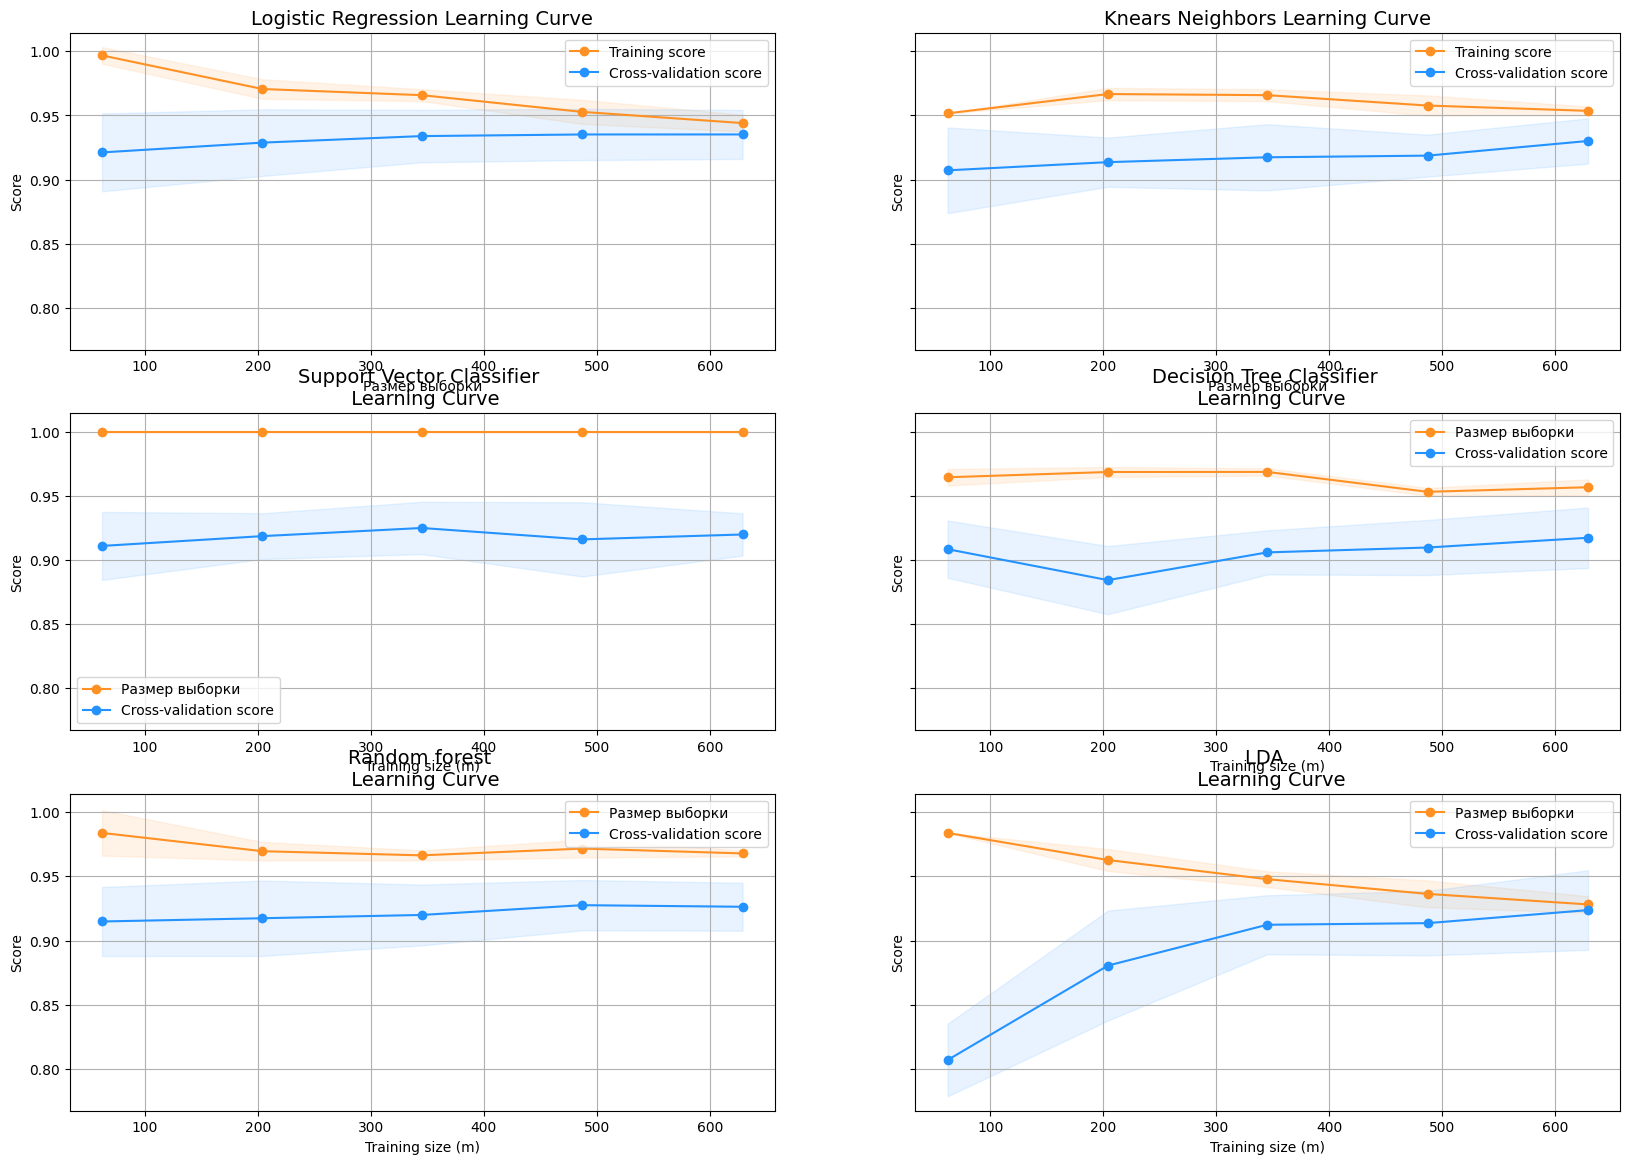

In [17]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curves(log_reg, knears_neighbors, svc, tree_clf, random_forest,lda , X_train, y_train)

## Кривые обучения:
<ul>
<li>Чем больше разрыв между результатами обучения и результатами кросс-валидации, тем больше вероятность того, что модель переобучилась (большой разброс).</li>
<li> Если результаты низкие как на обучающем, так и на кросс-валидационном наборе, это указывает на то, что наша модель недообучилась (большое смещение).</li>
<li>Лучшие результаты у логистической регрессии, Knears и Random Forest</li>
</ul>

In [18]:
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

rf_pred = cross_val_predict(random_forest, X_train, y_train, cv=5)

lda_pred = cross_val_predict(lda, X_train, y_train, cv=5)

In [19]:
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))
print('Random Forest Classifier: ', roc_auc_score(y_train, rf_pred))
print('LDA Classifier: ', roc_auc_score(y_train, lda_pred))


Logistic Regression:  0.9844357474070342
KNears Neighbors:  0.9301804419989409
Support Vector Classifier:  0.9448599217266632
Decision Tree Classifier:  0.9161758437633201
Random Forest Classifier:  0.9339778613037806
LDA Classifier:  0.9238449516281113


Построим roc-кривую и посчитаем площадь под ней.

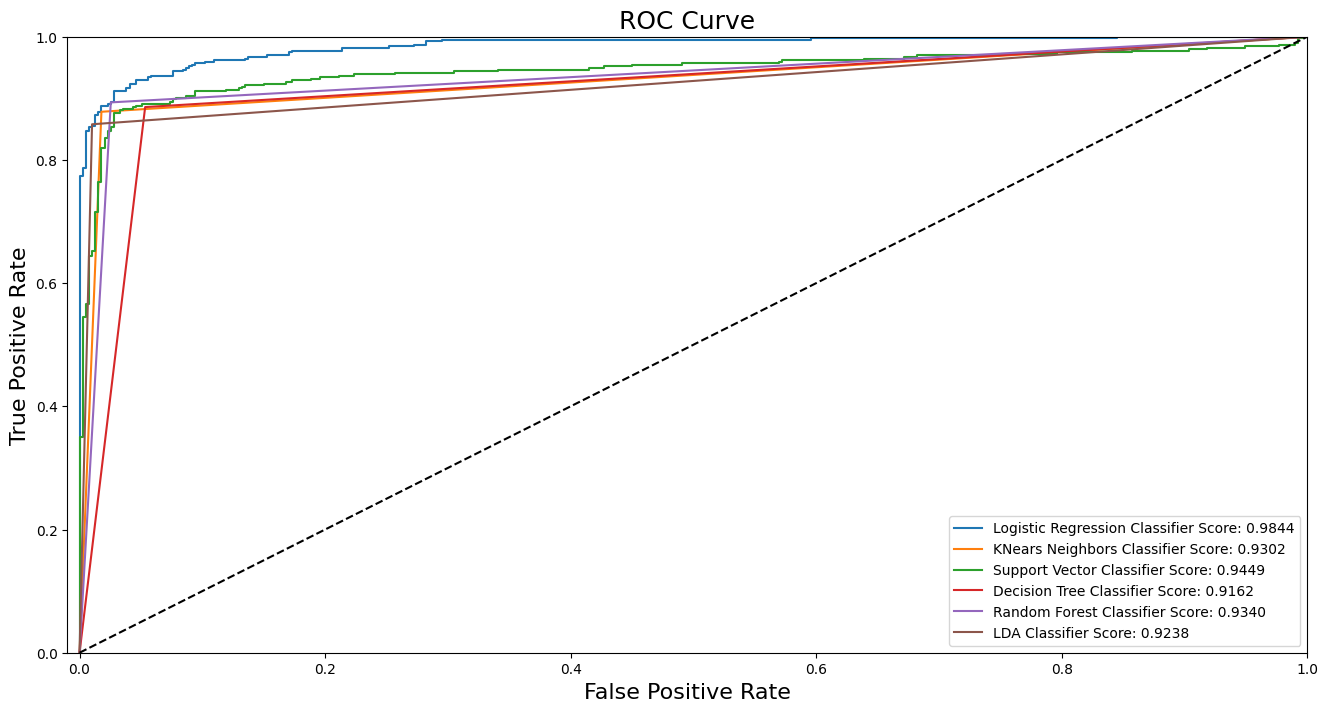

In [20]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)#
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)#
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)#
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)#
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_train, rf_pred)#
lda_fpr, lda_tpr, lda_threshold = roc_curve(y_train, lda_pred)#


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, rf_fpr, rf_tpr, lda_fpr, lda_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, rf_pred)))
    plt.plot(lda_fpr, lda_tpr, label='LDA Classifier Score: {:.4f}'.format(roc_auc_score(y_train, lda_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr,rf_fpr, rf_tpr, lda_fpr, lda_tpr)
plt.show()

Вывод: несмотря на добавление Random Forest и LDA, логистическая регрессия всё равно показала наилучший результат среди всех рассмотренных моделей.

### SMOTE метод (Over-Sampling):

<b>SMOTE</b> означает Synthetic Minority Over-sampling Technique.  В отличие от Random Under-Sampling, SMOTE создает новые синтетические точки для того, чтобы создать баланс классов. Это еще одна альтернатива для решения проблемы дисбаланса классов. <br><br>


<b> Принцип работы SMOTE: </b>
<ul>
<li><b>Генерация синтетических точек: </b> SMOTE выбирает расстояние между ближайшими соседями меньшего класса и между ними создает синтетические точки. </li>
<li> <b>Преимущество:  </b> Сохраняется больше информации, поскольку нам не пришлось удалять данные, в отличие от under-sampling.</li>
</ul>

### Правильное использование SMOTE
Если мы создадим синтетические точки перед кросс-валидацией, мы окажем определенное влияние на тестовое выборку. Но тестовая выборка не должна быть тронута! По этой причине мы должны создавать синтетические точки данных во время кросс-валидации, а не до нее.

Попробуем в качестве алгоритм подбора гиперпараметров случайный поиск. Он работает быстрее, чем поиск по сетке.

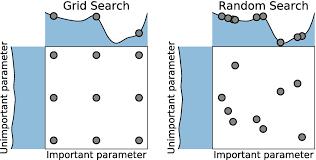

In [21]:
# Берем кусок кода из предыдущего блокнота



from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() # Менее чувствителен к выбросам, чем просто стандартизация

X = df.drop('Class', axis=1)
y = df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2,
                                                                                    random_state = 42)


original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1,1))
original_Xtest['scaled_amount'] = rob_scaler.fit_transform(original_Xtest['Amount'].values.reshape(-1,1))

original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1,1))
original_Xtest['scaled_time'] = rob_scaler.fit_transform(original_Xtest['Time'].values.reshape(-1,1))

original_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label/ len(original_ytrain))
print("Тестовый набор:", test_counts_label/ len(original_ytest))

Распределение классов: 

Обучающий набор: [0.99823564 0.00176436]
Тестовый набор: [0.99842 0.00158]


In [22]:
# сохраним параметры наших классификаторов, на которых они показали лучших результат с GridSearchCV

#dictionary of classifiers objects which we got in the above cell via GridSearchCV
#with the tuned parameters
tuned_classifiers = {
    "LogisiticRegression": log_reg,
    "Knears Neighbors": knears_neighbors,
    #"Support Vector Classifier": svc,  - тут какая-то ересь, либо грузит долго, либо результат = ошибка
    "DecisionTreeClassifier": tree_clf
}

#Making our Classifiers train with the tuned parameters
for key, classifier in tuned_classifiers.items():
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f'{key} Cross Validation Score: {round(score.mean() * 100, 2)}%')

LogisiticRegression Cross Validation Score: 93.52%
Knears Neighbors Cross Validation Score: 93.01%
DecisionTreeClassifier Cross Validation Score: 91.99%


In [23]:
#Over Sampling and under sampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Machine learning Pipeline libraries
from imblearn.pipeline import Pipeline



# here we are using the imbalanced dataset
X = df.drop('Class', axis=1)
y = df['Class']



# StratifiedKFold is used for cross validation
# This cross-validation object is a variation of KFold that returns stratified folds.
# The folds are made by preserving the percentage of samples for each class.
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# creating the object for Over Sampling the minority class
over = SMOTE(sampling_strategy=0.01,k_neighbors=5)

# creating the object for Under Sampling the majority class
under = RandomUnderSampler(sampling_strategy=0.5)

# iterating thru the dictionary of tuned classifiers
for key, classifier in tuned_classifiers.items():

    # list of steps to be provided to the ML Pipeline
    steps=[('o',over),('u',under),('model',classifier)]

    # Creating a ML Pipeline
    FiPipeline=Pipeline(steps=steps)

    # Cross validating the classifiers
    scores=cross_val_score(FiPipeline,X,y,cv=sss)

    # Printing the mean accuracy score
    print(f"Classifiers: {key} Has a training score of, {round(scores.mean() * 100, 2)} % accuracy score")

Classifiers: LogisiticRegression Has a training score of, 98.6 % accuracy score
Classifiers: Knears Neighbors Has a training score of, 93.07 % accuracy score
Classifiers: DecisionTreeClassifier Has a training score of, 99.16 % accuracy score


In [24]:
# taking a fold of a data to do GridSearchCV for best parameters for SMOTE
for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# creating a ML pipeline
model = Pipeline([
        ('sampling', SMOTE(sampling_strategy=0.01)),
        ('Random',RandomUnderSampler(sampling_strategy=0.5)),
        ('classification', log_reg)
    ])

# Running GridSearchCV on our ML pipeline by varying the k_neighbors from 1 to 10
# to find the best k_neighbors parameter value
# NOTE :- in paramgrid use above key + 2 _ followed by parameter
SMOTE_KN = GridSearchCV(model,{'sampling__k_neighbors':list(range(1,10))})
SMOTE_KN.fit(original_Xtrain,original_ytrain)

print(SMOTE_KN.best_estimator_)
print(SMOTE_KN.best_score_)
print(SMOTE_KN.best_params_)

# Training logistic regression classifier using SMOTE best parameter value for k_neighbors parameter
log_reg_score = cross_val_score(SMOTE_KN.best_estimator_, original_Xtrain, original_ytrain, cv=5)

# printing the mean accuracy score
print(f'Logistic Regression Cross Validation Score: {round(log_reg_score.mean() * 100, 2)}%')

Pipeline(steps=[('sampling', SMOTE(k_neighbors=8, sampling_strategy=0.01)),
                ('Random', RandomUnderSampler(sampling_strategy=0.5)),
                ('classification', LogisticRegression(C=0.1))])
0.9881630672881638
{'sampling__k_neighbors': 8}
Logistic Regression Cross Validation Score: 98.64%


In [25]:
labels = ['Non Fraud', 'Fraud']

best_est = SMOTE_KN.best_estimator_
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

   Non Fraud       1.00      0.99      0.99     56863
       Fraud       0.10      0.89      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.94      0.58     56961
weighted avg       1.00      0.99      0.99     56961



In [26]:
y_score = best_est.decision_function(original_Xtest)

In [27]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Применим SMOTE после кросс-валидации
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [28]:
# Обучим логистическую регрессию
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Время обучения: {} сек".format(t1 - t0))

Время обучения: 9.786328554153442 сек


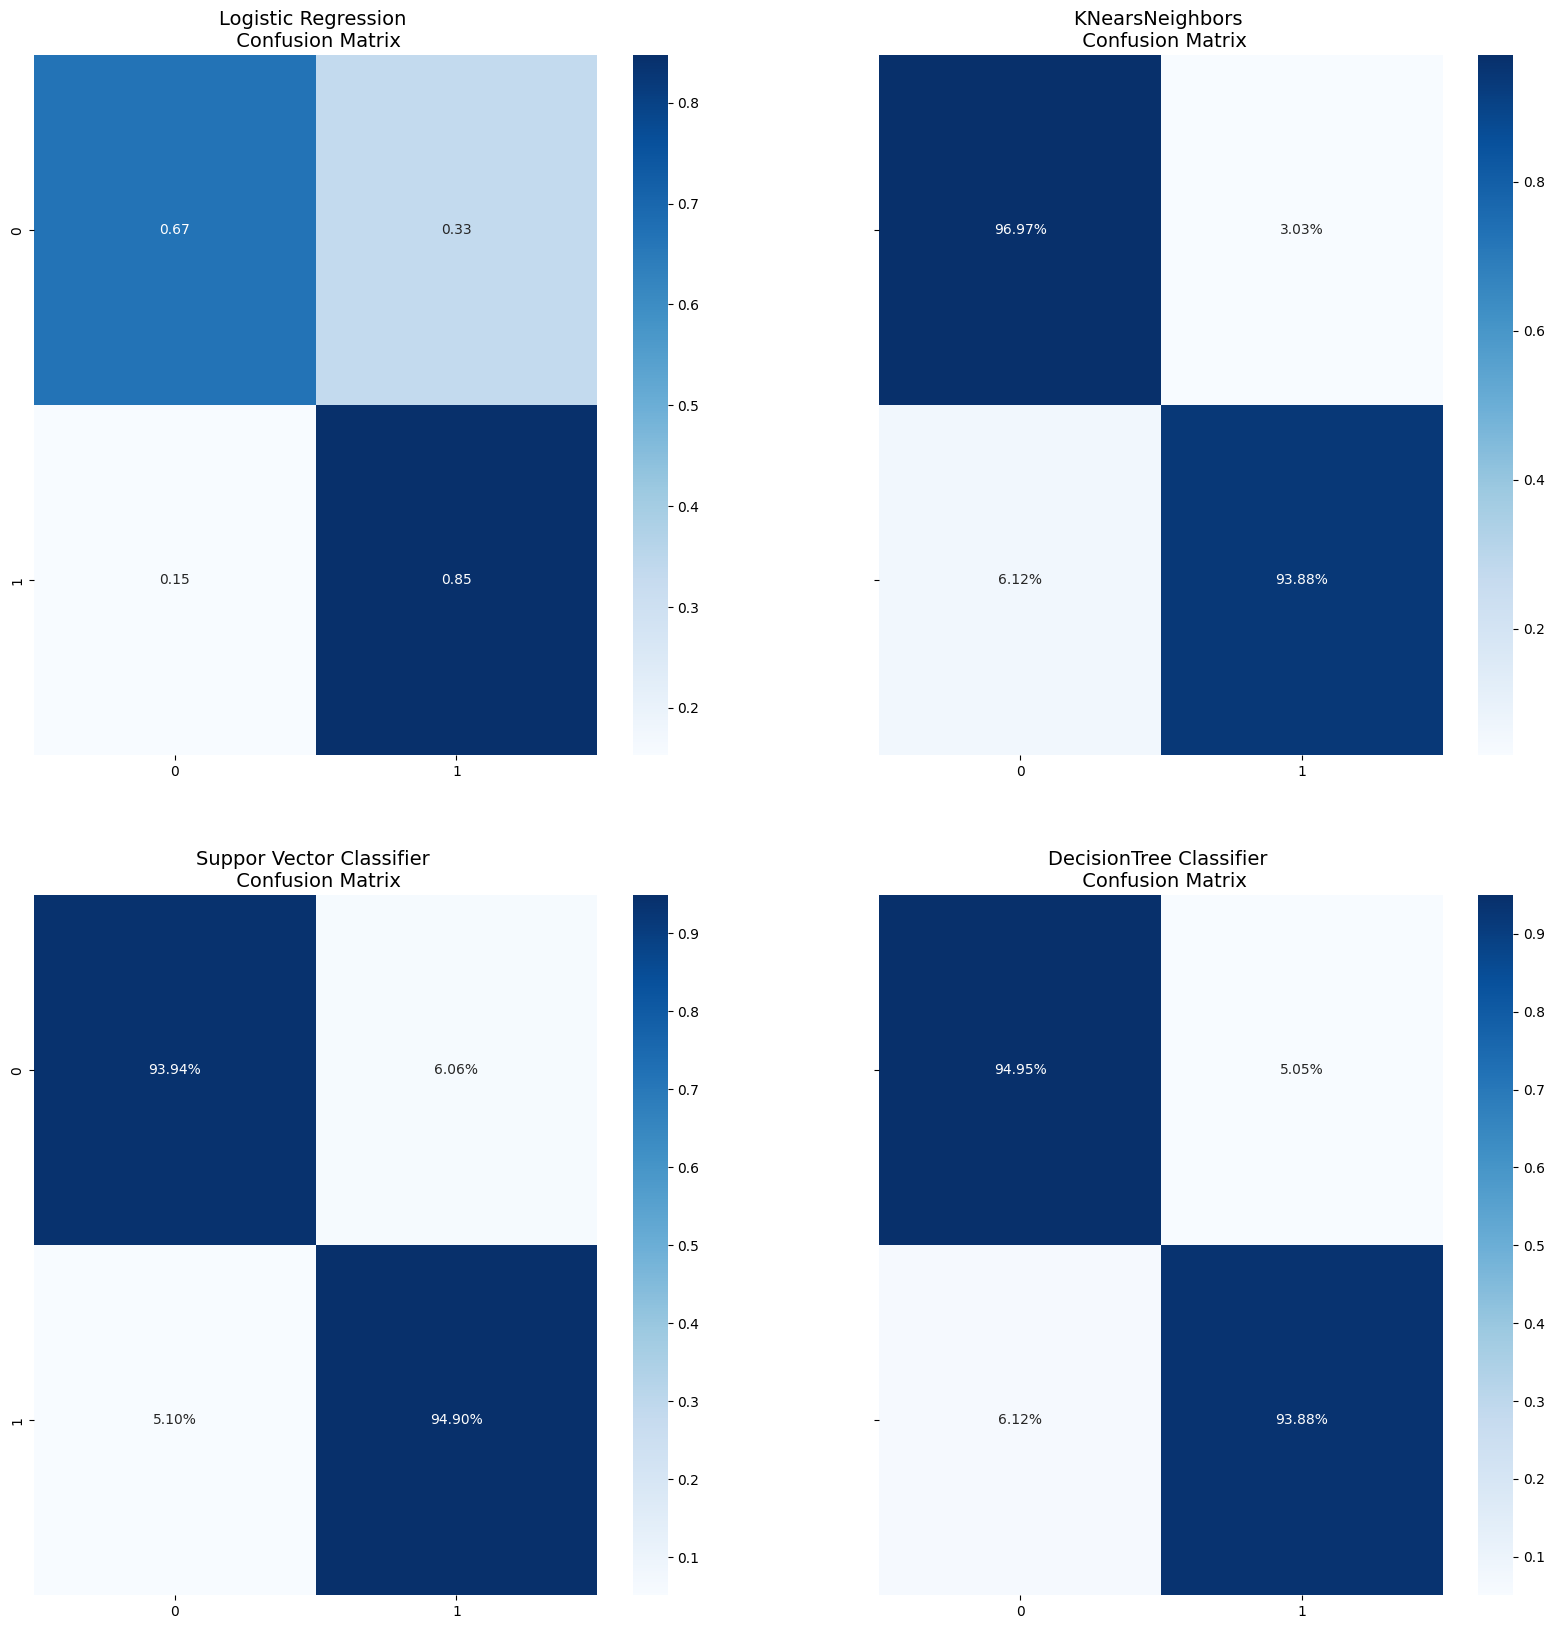

In [29]:
y_pred_log_reg = best_est.predict(X_test)

# Другие модели
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg, normalize='true')
kneighbors_cf = confusion_matrix(y_test, y_pred_knear, normalize='true')
svc_cf = confusion_matrix(y_test, y_pred_svc, normalize='true')
tree_cf = confusion_matrix(y_test, y_pred_tree, normalize='true')

fig,  ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,20), sharey=True)
# Построим матрицы ошибок
sns.heatmap(ax=ax1, data=log_reg_cf, annot=True, fmt='.2f', cmap='Blues')
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax2,data=kneighbors_cf, annot=True, fmt='.2%', cmap='Blues')
ax2.set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)


#
sns.heatmap(ax=ax3, data=svc_cf, annot=True,
            fmt='.2%', cmap='Blues')
ax3.set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax4, data=tree_cf, annot=True,
            fmt='.2%', cmap='Blues')
ax4.set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)


plt.show()

Выведем основные метрики моделей.

Давайте вспомним основные метрики качества классификации на примере нашей задачи:

* **Confusion matrix** : так же известна как матрица ошибок, состоит из 4 частей:

    * true positive (TP) : транзакция была мошеннической и модель предсказала ее как мошенническую
    * true negative (TN) : транзакция была нормальной и модель определила ее как нормальную
    * false positive (FP) : транзакция была нормальная, но модель среагировала на нее как на мошенническую
    * false negative (FN) : транзакция была мошенническая, но модель ее пропустила и посчитала нормальной


* **Метрики** :

    * Accuracy : (TP +TN) / (TP + TN + FP +FN)
    * Precision : TP / (TP + FP) (подходит при дисбалансе)
    * Recall : TP / (TP + FN) (подходит при дисбалансе)
    * F1 score : 2 x ((Precision x Recall) / (Precision + Recall)) (подходит при дисбалансе)

* **Roc-кривая** : ROC-кривая строится путем отрисовки графика зависимости частоты истинных положительных результатов (TPR) от частоты ложных положительных результатов (FPR) при различных пороговых значениях.

In [30]:
from sklearn.metrics import classification_report



print('Logistic Regression:')
#
y_pred=  best_est.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('KNears Neighbors:')
#
y_pred=  knears_neighbors.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Support Vector Classifier:')
#
y_pred=  svc.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Decision Tree Classifier:')
#
y_pred=  tree_clf.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))



Logistic Regression:
              precision    recall  f1-score   support

   Non Fraud       1.00      0.99      0.99     56863
       Fraud       0.10      0.89      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.94      0.58     56961
weighted avg       1.00      0.99      0.99     56961

KNears Neighbors:
              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     56863
       Fraud       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Support Vector Classifier:
              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     56863
       Fraud       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted

Поскольку мы выбрали Decision Tree Classifier в качестве основной модели, давайте сравним ее качество в случае подхода under-sampling и в случае over-sampling.

In [31]:
# Логистическая регрессия с under-sampling
y_pred = log_reg.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, y_pred)

# Логистическая регрессия с over-sampling
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Метод': ['Random Under-Sampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Метод,Score
0,Random Under-Sampling,0.981882
1,Oversampling (SMOTE),0.985657


ADASYN

In [42]:
#Over Sampling and under sampling libraries
from imblearn.over_sampling import ADASYN


# StratifiedKFold is used for cross validation
# This cross-validation object is a variation of KFold that returns stratified folds.
# The folds are made by preserving the percentage of samples for each class.
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# creating the object for Over Sampling the minority class
over = ADASYN(sampling_strategy=0.01, n_neighbors=5)

# creating the object for Under Sampling the majority class
under = RandomUnderSampler(sampling_strategy=0.5)

# iterating thru the dictionary of tuned classifiers
for key, classifier in tuned_classifiers.items():

    # list of steps to be provided to the ML Pipeline
    steps=[('o',over),('u',under),('model',classifier)]

    # Creating a ML Pipeline
    FiPipeline=Pipeline(steps=steps)

    # Cross validating the classifiers
    scores=cross_val_score(FiPipeline,X,y,cv=sss)

    # Printing the mean accuracy score
    print(f"Classifiers: {key} Has a training score of, {round(scores.mean() * 100, 2)} % accuracy score")

Classifiers: LogisiticRegression Has a training score of, 98.58 % accuracy score
Classifiers: Knears Neighbors Has a training score of, 92.71 % accuracy score
Classifiers: DecisionTreeClassifier Has a training score of, 98.56 % accuracy score


In [43]:
# taking a fold of a data to do GridSearchCV for best parameters for SMOTE
for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# creating a ML pipeline
model = Pipeline([
    ('sampling', ADASYN(sampling_strategy=0.01)),
    ('under', RandomUnderSampler(sampling_strategy=0.5)),
    ('classification', log_reg)
])

# Running GridSearchCV on our ML pipeline by varying the k_neighbors from 1 to 10
# to find the best k_neighbors parameter value
# NOTE :- in paramgrid use above key + 2 _ followed by parameter
ADASYN_KN = GridSearchCV(model, {'sampling__n_neighbors': list(range(1, 10))})
ADASYN_KN.fit(original_Xtrain, original_ytrain)

print("Best Estimator:", ADASYN_KN.best_estimator_)
print("Best Score:", ADASYN_KN.best_score_)
print("Best Parameters:", ADASYN_KN.best_params_)

# Оценка качества модели с использованием лучшего параметра n_neighbors
log_reg_score = cross_val_score(ADASYN_KN.best_estimator_, original_Xtrain, original_ytrain, cv=5)
print(f"Logistic Regression Cross Validation Score with ADASYN: {round(log_reg_score.mean() * 100, 2)}%")

Best Estimator: Pipeline(steps=[('sampling', ADASYN(n_neighbors=8, sampling_strategy=0.01)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('classification', LogisticRegression(C=0.1))])
Best Score: 0.9881498930262393
Best Parameters: {'sampling__n_neighbors': 8}
Logistic Regression Cross Validation Score with ADASYN: 98.62%


In [44]:
labels = ['Non Fraud', 'Fraud']
best_est_adasyn = ADASYN_KN.best_estimator_
adasyn_prediction = best_est_adasyn.predict(original_Xtest)
print(classification_report(original_ytest, adasyn_prediction, target_names=labels))

              precision    recall  f1-score   support

   Non Fraud       1.00      0.99      0.99     56863
       Fraud       0.12      0.88      0.21        98

    accuracy                           0.99     56961
   macro avg       0.56      0.93      0.60     56961
weighted avg       1.00      0.99      0.99     56961



In [45]:
y_pred_log_reg = best_est_adasyn.predict(original_Xtest)
y_pred_knear = knears_neighbors.predict(original_Xtest)
y_pred_svc = svc.predict(original_Xtest)
y_pred_tree = tree_clf.predict(original_Xtest)

In [46]:
log_reg_cf = confusion_matrix(original_ytest, y_pred_log_reg, normalize='true')
kneighbors_cf = confusion_matrix(original_ytest, y_pred_knear, normalize='true')
svc_cf = confusion_matrix(original_ytest, y_pred_svc, normalize='true')
tree_cf = confusion_matrix(original_ytest, y_pred_tree, normalize='true')

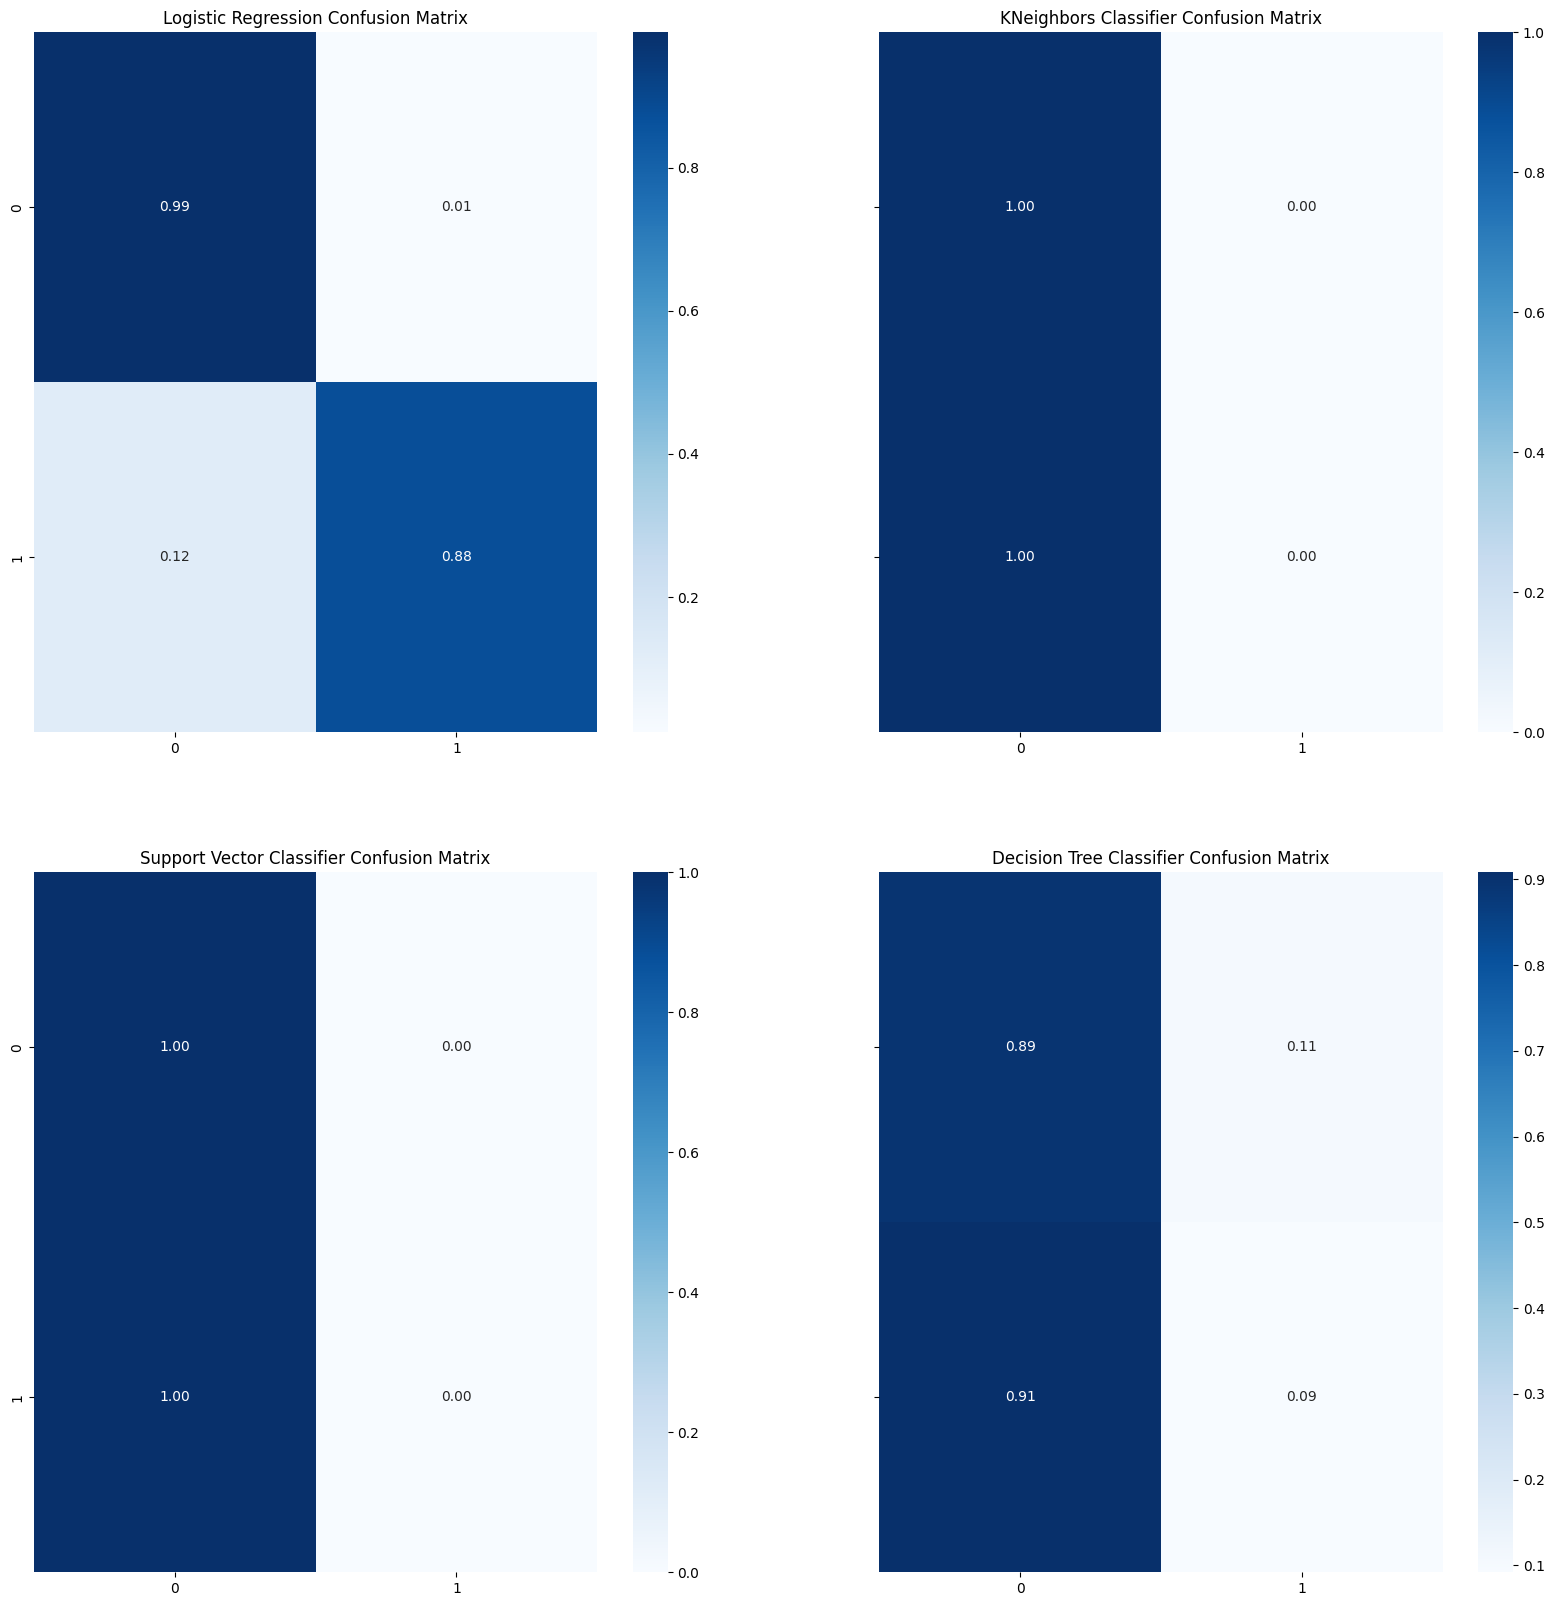

In [47]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20), sharey=True)
sns.heatmap(log_reg_cf, annot=True, fmt='.2f', cmap='Blues', ax=ax1)
ax1.set_title("Logistic Regression Confusion Matrix")
sns.heatmap(kneighbors_cf, annot=True, fmt='.2f', cmap='Blues', ax=ax2)
ax2.set_title("KNeighbors Classifier Confusion Matrix")
sns.heatmap(svc_cf, annot=True, fmt='.2f', cmap='Blues', ax=ax3)
ax3.set_title("Support Vector Classifier Confusion Matrix")
sns.heatmap(tree_cf, annot=True, fmt='.2f', cmap='Blues', ax=ax4)
ax4.set_title("Decision Tree Classifier Confusion Matrix")
plt.show()

In [48]:
print("Logistic Regression:")
print(classification_report(original_ytest, y_pred_log_reg, target_names=labels))

print("KNeighbors Classifier:")
print(classification_report(original_ytest, y_pred_knear, target_names=labels))

print("Support Vector Classifier:")
print(classification_report(original_ytest, y_pred_svc, target_names=labels))

print("Decision Tree Classifier:")
print(classification_report(original_ytest, y_pred_tree, target_names=labels))

Logistic Regression:
              precision    recall  f1-score   support

   Non Fraud       1.00      0.99      0.99     56863
       Fraud       0.12      0.88      0.21        98

    accuracy                           0.99     56961
   macro avg       0.56      0.93      0.60     56961
weighted avg       1.00      0.99      0.99     56961

KNeighbors Classifier:
              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     56863
       Fraud       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Support Vector Classifier:
              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     56863
       Fraud       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
wei

In [49]:
y_pred_adasyn = best_est_adasyn.predict(original_Xtest)
adasyn_score = accuracy_score(original_ytest, y_pred_adasyn)

y_pred_under = log_reg.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, y_pred_under)

results = pd.DataFrame({
    "Method": ["Random Under-Sampling", "Oversampling (ADASYN)",'Oversampling (SMOTE)'],
    "Score": [undersample_score, adasyn_score,oversample_score]
})

results

,Method,Score
0,Random Under-Sampling,0.981882
1,Oversampling (ADASYN),0.988922
2,Oversampling (SMOTE),0.985657


Accuracy для логистической регрессии после ADASYN и SMOTE оказалась примерно одинаковой. Но судя по матрице ошибок можно сказать, что после замены SMOTE на ADASYN, матрица логистической регрессии в целом не изменилась, в отличие от остальных моделей, которые по простому перестали распознавать мошеннические и немошеннические транзакции.